In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_used.csv')

In [3]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Lot Size'] = pd.to_numeric(df['Lot Size'], errors='coerce')

In [4]:
df = df.dropna(subset=['Price' , 'Lot Size'])

In [5]:
df['Price_per_acre'] = df['Price'] / df ['Lot Size']
df

,Price,Lot Size,Price_per_acre
0,28000,0.82,3.414634e+04
1,70000,0.32,2.187500e+05
4,28000,0.88,3.181818e+04
5,39900,0.56,7.125000e+04
6,56000,0.31,1.806452e+05
7,32000,0.74,4.324324e+04
8,53000,0.34,1.558824e+05
9,58750,0.38,1.546053e+05
10,24000,0.76,3.157895e+04
11,725000,0.51,1.421569e+06


In [6]:
# Calculate Quartiles
Q1 = df['Price_per_acre'].quantile(0.25)
Q3 = df['Price_per_acre'].quantile(0.75)

In [7]:
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

In [8]:
data_no_outliers = df[(df['Price_per_acre'] >= lower_threshold) & (df['Price_per_acre'] <= upper_threshold)]


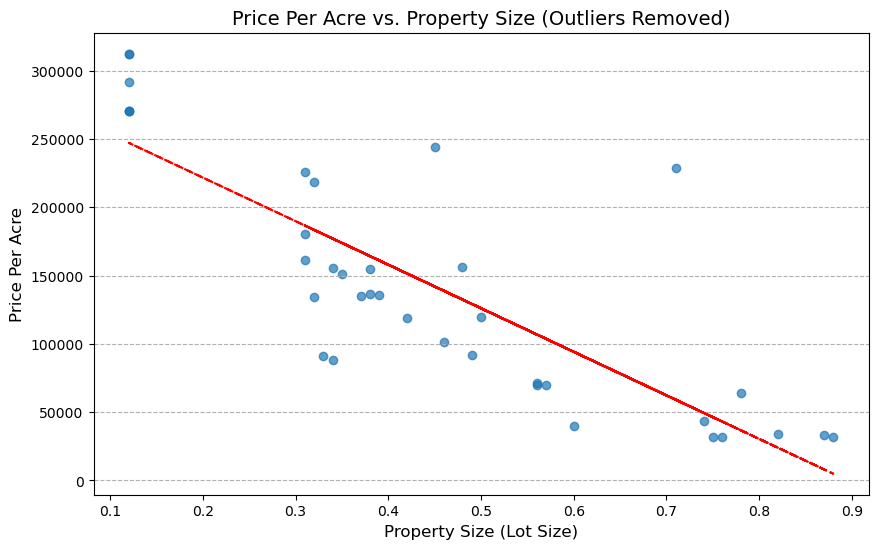

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(data_no_outliers['Lot Size'], data_no_outliers['Price_per_acre'], alpha=0.7)

# Add labels and a title
plt.xlabel('Property Size (Lot Size)', fontsize=12)
plt.ylabel('Price Per Acre', fontsize=12)
plt.title('Price Per Acre vs. Property Size (Outliers Removed)', fontsize=14)
plt.grid(axis='y', linestyle='--')

# Optionally, add trendline
z = np.polyfit(data_no_outliers['Lot Size'], data_no_outliers['Price_per_acre'], 1)
p = np.poly1d(z)
plt.plot(data_no_outliers['Lot Size'], p(data_no_outliers['Lot Size']), "r--")

# Print plot
plt.show()